# Data Mining with Rattle and R
:The Art of Excavating Data for Knowledge Discovery  
by Graham Williams  
ISBN 978-1-4419-9889-7 e-ISBN 978-1-4419-9890-3  


### Start Rattle

In [1]:
library(rattle)
#rattle()
library(magrittr) # For the %>% and %<>% pipeline operators.

Rattle: A free graphical interface for data science with R.
バージョン 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
'rattle()' と入力して、データを多角的に分析します。


### Loading Dataset

In [2]:
fname <- system.file("csv", "weather.csv", package="rattle") 
crs$dataset <- read.csv(fname, encoding="UTF-8")

crs$nobs     <- nrow(crs$dataset)
crs$train    <- crs$sample <- sample(crs$nobs, 0.7*crs$nobs)
crs$validate <- sample(setdiff(seq_len(crs$nobs), crs$train), 0.15*crs$nobs)
crs$test     <- setdiff(setdiff(seq_len(crs$nobs), crs$train), crs$validate)

# The following variable selections have been noted.

crs$input     <- c("MinTemp", "MaxTemp", "Rainfall", "Evaporation",
                   "Sunshine", "WindGustDir", "WindGustSpeed", "WindDir9am",
                   "WindDir3pm", "WindSpeed9am", "WindSpeed3pm", "Humidity9am",
                   "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am",
                   "Cloud3pm", "Temp9am", "Temp3pm", "RainToday")

crs$numeric   <- c("MinTemp", "MaxTemp", "Rainfall", "Evaporation",
                   "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
                   "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                   "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm")

crs$categoric <- c("WindGustDir", "WindDir9am", "WindDir3pm", "RainToday")

crs$target    <- "RainTomorrow"
crs$risk      <- "RISK_MM"
crs$ident     <- "Date"
crs$ignore    <- "Location"
crs$weights   <- NULL

## Explore
### Summary

In [3]:
# The 'Hmisc' package provides the 'contents' function.
library(Hmisc)

# Obtain a summary of the dataset.
contents(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)])
summary(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)])

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units




Data frame:crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)]	256 observations and 22 variables    Maximum # NAs:23


              Levels Storage NAs
MinTemp               double   0
MaxTemp               double   0
Rainfall              double   0
Evaporation           double   0
Sunshine              double   2
WindGustDir       16 integer   2
WindGustSpeed        integer   2
WindDir9am        16 integer  23
WindDir3pm        16 integer   0
WindSpeed9am         integer   6
WindSpeed3pm         integer   0
Humidity9am          integer   0
Humidity3pm          integer   0
Pressure9am           double   0
Pressure3pm           double   0
Cloud9am             integer   0
Cloud3pm             integer   0
Temp9am               double   0
Temp3pm               double   0
RainToday          2 integer   0
RISK_MM               double   0
RainTomorrow       2 integer   0

+------------+---------------------------------------------------+
|Variable    |Levels                         

    MinTemp          MaxTemp         Rainfall       Evaporation    
 Min.   :-5.300   Min.   : 7.60   Min.   : 0.000   Min.   : 0.200  
 1st Qu.: 1.300   1st Qu.:14.70   1st Qu.: 0.000   1st Qu.: 2.200  
 Median : 6.550   Median :19.45   Median : 0.000   Median : 4.000  
 Mean   : 6.819   Mean   :20.16   Mean   : 1.394   Mean   : 4.439  
 3rd Qu.:12.100   3rd Qu.:25.35   3rd Qu.: 0.200   3rd Qu.: 6.200  
 Max.   :20.900   Max.   :35.70   Max.   :25.800   Max.   :13.800  
                                                                   
    Sunshine       WindGustDir WindGustSpeed     WindDir9am    WindDir3pm
 Min.   : 0.000   NW     :51   Min.   :13.00   NNW    : 27   WNW    :45  
 1st Qu.: 6.100   NNW    :32   1st Qu.:31.00   SE     : 27   NW     :40  
 Median : 8.600   E      :30   Median :40.00   SSE    : 27   NNW    :34  
 Mean   : 8.016   WNW    :25   Mean   :40.09   S      : 22   N      :24  
 3rd Qu.:10.575   ESE    :21   3rd Qu.:46.00   ESE    : 21   ESE    :19  
 Max.   :13.

### basic detailed stats of numeric data

In [4]:
# The 'basicStats' package provides the 'fBasics' function.
library(fBasics)

# Generate a description of the numeric data.
lapply(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)][,c(1:5, 7, 10:19, 21)], basicStats)

Loading required package: timeDate
Loading required package: timeSeries


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org


,X...X.i
nobs,256.000000
NAs,0.000000
Minimum,-5.300000
Maximum,20.900000
1. Quartile,1.300000
3. Quartile,12.100000
Mean,6.818750
Median,6.550000
Sum,1745.600000
SE Mean,0.387224


#### Skewness is a measure of how asymmetrically oru data is distributed

In [5]:
# The 'skewness' package provides the 'fBasics' function.
#library(fBasics)

# Summarise the skewness of the numeric data.
skewness(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)][,c(1:5, 7, 10:19, 21)], na.rm=TRUE)

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine 
   0.10338000    0.29455248    3.66791405    0.75941040   -0.76072103 
WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm 
   0.93215131    1.40436804    0.47065725   -0.03674129    0.67964211 
  Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am 
  -0.46323709   -0.44768515    0.13017093    0.20213360    0.01258497 
      Temp3pm       RISK_MM 
   0.22908854    4.75126644

#### Kurtosis is a measure of the nature of the peaks in the distribution of the data
Larger value for kurtosis indicates tht distribution has a sharper peak.    
Lower kurtosis value indicates a flatter peak.

In [6]:
# The 'kurtosis' package provides the 'fBasics' function.
#library(fBasics)

# Summarise the kurtosis of the numeric data.
kurtosis(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)][,c(1:5, 7, 10:19, 21)], na.rm=TRUE)

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine 
  -1.14202885   -0.79102254   14.29068925    0.04154962   -0.09310668 
WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm 
   2.06213030    1.60165054   -0.21807824   -0.13629208    0.22925989 
  Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am 
   0.16621292    0.14347007   -1.68832686   -1.60393193   -1.07263288 
      Temp3pm       RISK_MM 
  -0.69824860   27.64974161

### Missing values
Show missing values: 1 indicates a value is present, whereas a 0 indicates a value is missing.  
Left column records nmber of observations that match the corresponding pattern of missing values over the variables.  
Final column on the right is the number of missing values within the pattern.

In [7]:
# The 'md.pattern' package provides the 'mice' function.
library(mice)

# Generate a summary of the missing values in the dataset.
md.pattern(crs$dataset[,c(crs$input, crs$target)])

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,⋯,Temp3pm,RainToday,RainTomorrow,WindDir3pm,WindGustSpeed,Sunshine,WindGustDir,WindSpeed9am,WindDir9am,
328,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,0,1,1,1
24,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,1,0,1,1,2
7,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,0,0,2
,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,2,3,3,7,31,47


### The 'gplots' package provides the 'barplot2' function.

In [8]:
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [9]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:timeSeries’:

    filter, lag

The following objects are masked from ‘package:Hmisc’:

    combine, src, summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Bar Plot 

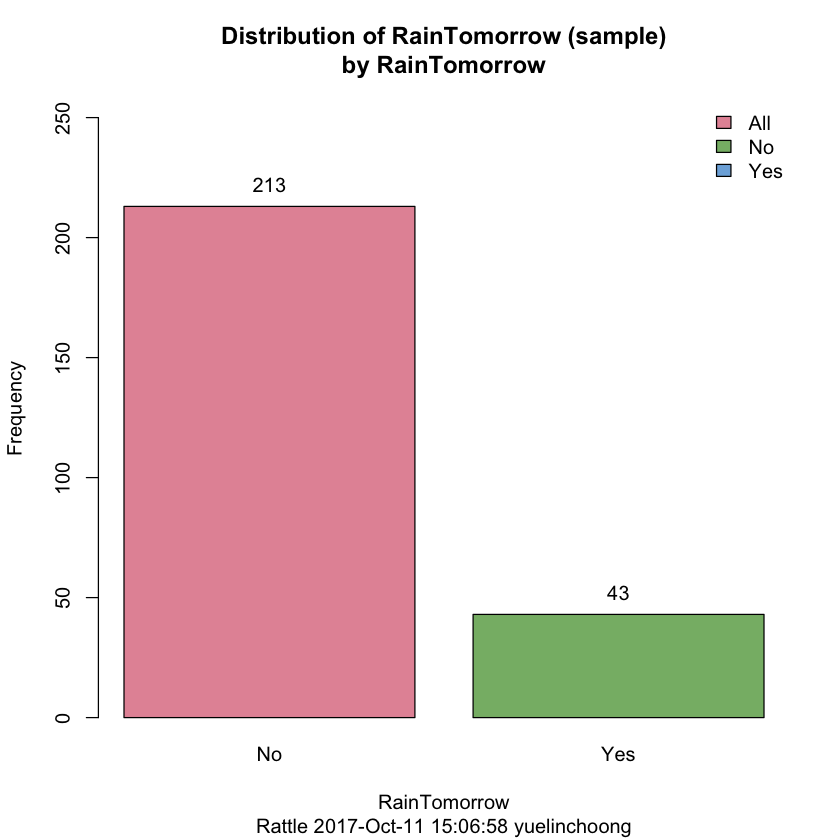

In [10]:
# Generate the summary data for plotting.
ds <- rbind(summary(na.omit(crs$dataset[crs$sample,]$RainTomorrow)))

# Sort the entries.
ord <- order(ds[1,], decreasing=TRUE)

# Plot the data.
bp <-  barplot2(ds[,ord], beside=TRUE, ylab="Frequency", xlab="RainTomorrow", ylim=c(0, 258), col=colorspace::rainbow_hcl(3))

# Add the actual frequencies.
text(bp, ds[,ord]+9, ds[,ord])

# Add a legend to the plot.
legend("topright", bty="n", c("All","No","Yes"),  fill=colorspace::rainbow_hcl(3))

# Add a title to the plot.
title(main="Distribution of RainTomorrow (sample)\nby RainTomorrow",
    sub=paste("Rattle", format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))

### Use ggplot2 to generate box plot MaxTemp & Sunshine
Box plot identifies the median and mean.  
(box-and-whisker plot)  
Useful for quickly ascertaining the distribution of numeric data.  

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

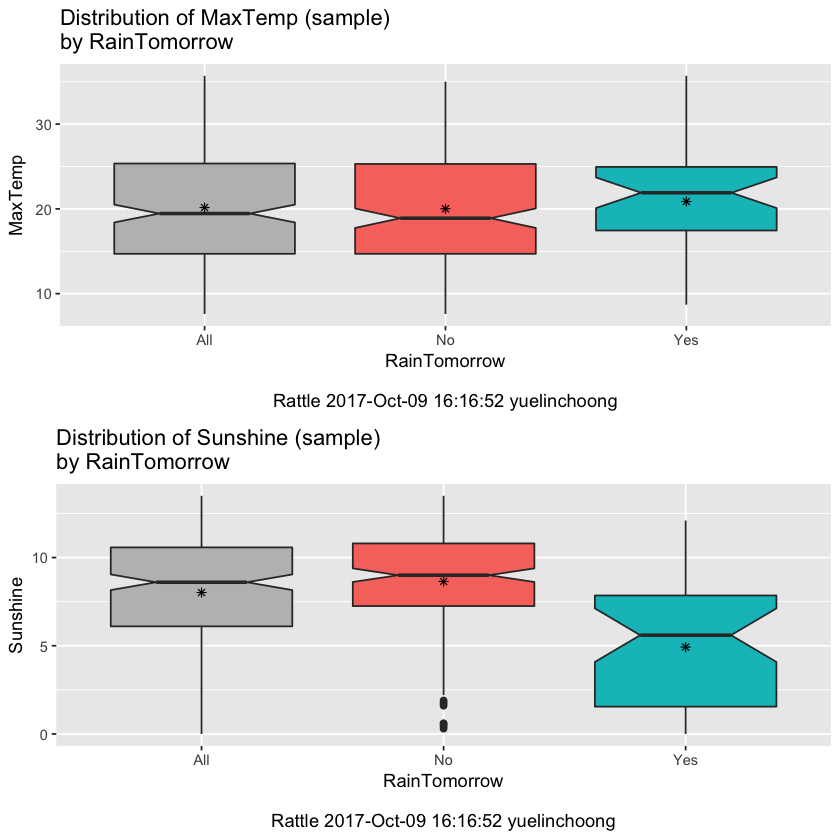

In [11]:
# Generate a box plot MaxTemp
p01 <- crs %>%
  with(dataset[sample,]) %>%
  dplyr::mutate(RainTomorrow=as.factor(RainTomorrow)) %>%
  ggplot2::ggplot(ggplot2::aes(y=MaxTemp)) +
  ggplot2::geom_boxplot(ggplot2::aes(x="All"), notch=TRUE, fill="grey") +
  ggplot2::stat_summary(ggplot2::aes(x="All"), fun.y=mean, geom="point", shape=8) +
  ggplot2::geom_boxplot(ggplot2::aes(x=RainTomorrow, fill=RainTomorrow), notch=TRUE) +
  ggplot2::stat_summary(ggplot2::aes(x=RainTomorrow), fun.y=mean, geom="point", shape=8) +
  ggplot2::xlab("RainTomorrow\n\nRattle 2017-Oct-09 16:16:52 yuelinchoong") +
  ggplot2::ggtitle("Distribution of MaxTemp (sample)\nby RainTomorrow") +
  ggplot2::theme(legend.position="none")

# Generate a box plot for Sunshine.
p02 <- crs %>%
  with(dataset[sample,]) %>%
  dplyr::mutate(RainTomorrow=as.factor(RainTomorrow)) %>%
  ggplot2::ggplot(ggplot2::aes(y=Sunshine)) +
  ggplot2::geom_boxplot(ggplot2::aes(x="All"), notch=TRUE, fill="grey") +
  ggplot2::stat_summary(ggplot2::aes(x="All"), fun.y=mean, geom="point", shape=8) +
  ggplot2::geom_boxplot(ggplot2::aes(x=RainTomorrow, fill=RainTomorrow), notch=TRUE) +
  ggplot2::stat_summary(ggplot2::aes(x=RainTomorrow), fun.y=mean, geom="point", shape=8) +
  ggplot2::xlab("RainTomorrow\n\nRattle 2017-Oct-09 16:16:52 yuelinchoong") +
  ggplot2::ggtitle("Distribution of Sunshine (sample)\nby RainTomorrow") +
  ggplot2::theme(legend.position="none")

# Display the plots.

gridExtra::grid.arrange(p01, p02)

#### Box plot of humidity 

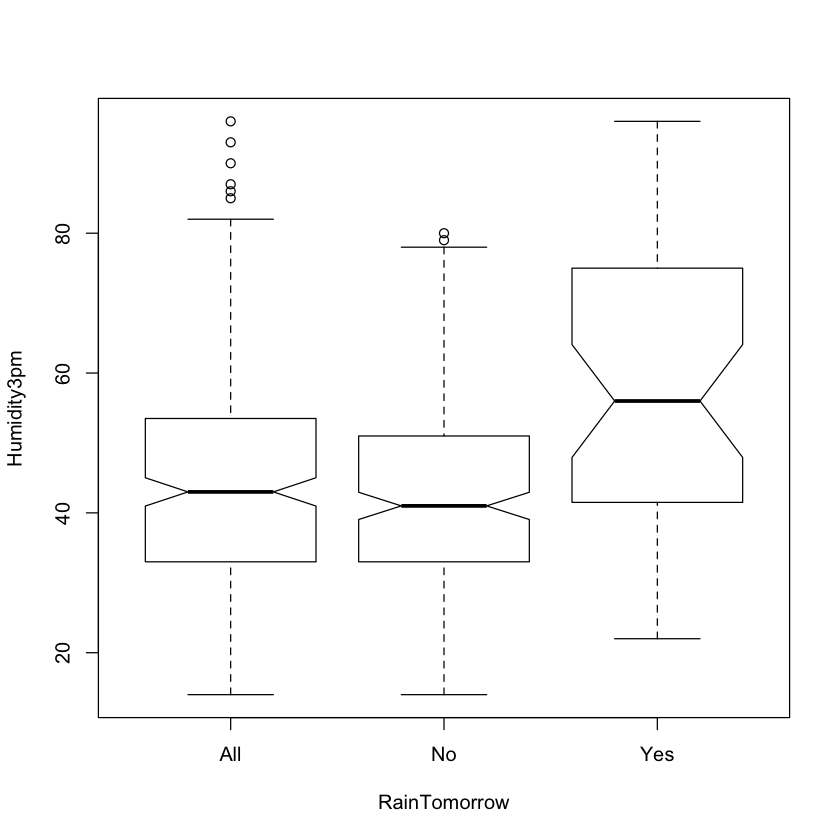

In [12]:
ds <- with(crs$dataset[crs$train,],
     rbind(data.frame(dat=Humidity3pm,
                      grp="All"),
           data.frame(dat=Humidity3pm[RainTomorrow=="No"],
                      grp="No"),
           data.frame(dat=Humidity3pm[RainTomorrow=="Yes"],
                      grp="Yes")))
bp <- boxplot(formula=dat ~ grp, data=ds,
                xlab="RainTomorrow", ylab="Humidity3pm",
                notch=TRUE)

### Use ggplot2 to generate histogram plot for MaxTemp & Sunshine.
Histogram shows the range of values of the variable and show the number of items in each value.  

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

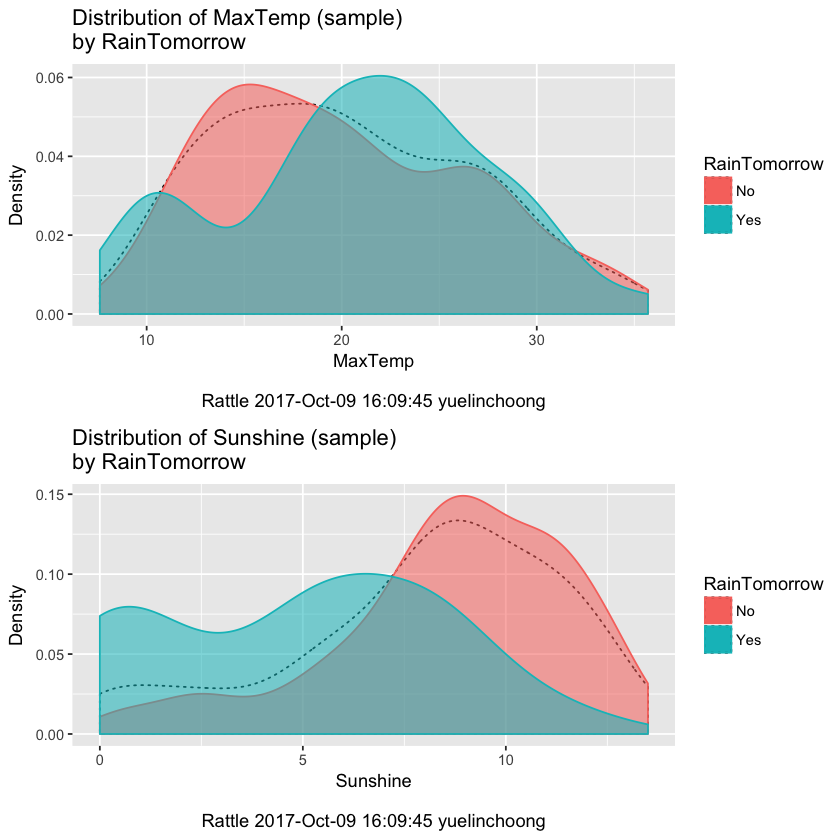

In [16]:
# Generate the plot for MaxTemp
p01 <- crs %>%
  with(dataset[sample,]) %>%
  dplyr::mutate(RainTomorrow=as.factor(RainTomorrow)) %>%
  dplyr::select(MaxTemp, RainTomorrow) %>%
  ggplot2::ggplot(ggplot2::aes(x=MaxTemp)) +
  ggplot2::geom_density(lty=3) +
  ggplot2::geom_density(ggplot2::aes(fill=RainTomorrow, colour=RainTomorrow), alpha=0.55) +
  ggplot2::xlab("MaxTemp\n\nRattle 2017-Oct-09 16:09:45 yuelinchoong") +
  ggplot2::ggtitle("Distribution of MaxTemp (sample)\nby RainTomorrow") +
  ggplot2::labs(fill="RainTomorrow", y="Density")

# Generate the plot for Sunshine
p02 <- crs %>%
  with(dataset[sample,]) %>%
  dplyr::mutate(RainTomorrow=as.factor(RainTomorrow)) %>%
  dplyr::select(Sunshine, RainTomorrow) %>%
  ggplot2::ggplot(ggplot2::aes(x=Sunshine)) +
  ggplot2::geom_density(lty=3) +
  ggplot2::geom_density(ggplot2::aes(fill=RainTomorrow, colour=RainTomorrow), alpha=0.55) +
  ggplot2::xlab("Sunshine\n\nRattle 2017-Oct-09 16:09:45 yuelinchoong") +
  ggplot2::ggtitle("Distribution of Sunshine (sample)\nby RainTomorrow") +
  ggplot2::labs(fill="RainTomorrow", y="Density")

# Display the plots.
gridExtra::grid.arrange(p01, p02)

## Scatter plots
Selecting distribution will have Rattle randomly select maximum of 6 variables for scatter plot

##### Scatter or Pairs Plot (Plot a Correlation Matrix) 
##### The 'Deducer' package provides the 'ggcorplot' function.
library(Deducer)

Warning message in check_and_set_ggpairs_defaults("diag", diag, continuous = "densityDiag", :
“Changing diag$continuous from 'density' to 'densityDiag'”Warning message in check_and_set_ggpairs_defaults("diag", diag, continuous = "densityDiag", :
“Changing diag$discrete from 'bar' to 'barDiag'”Warning message:
“Removed 2 rows containing non-finite values (stat_density).”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message:
“Removed 2 rows containing missing values (geom_point).”

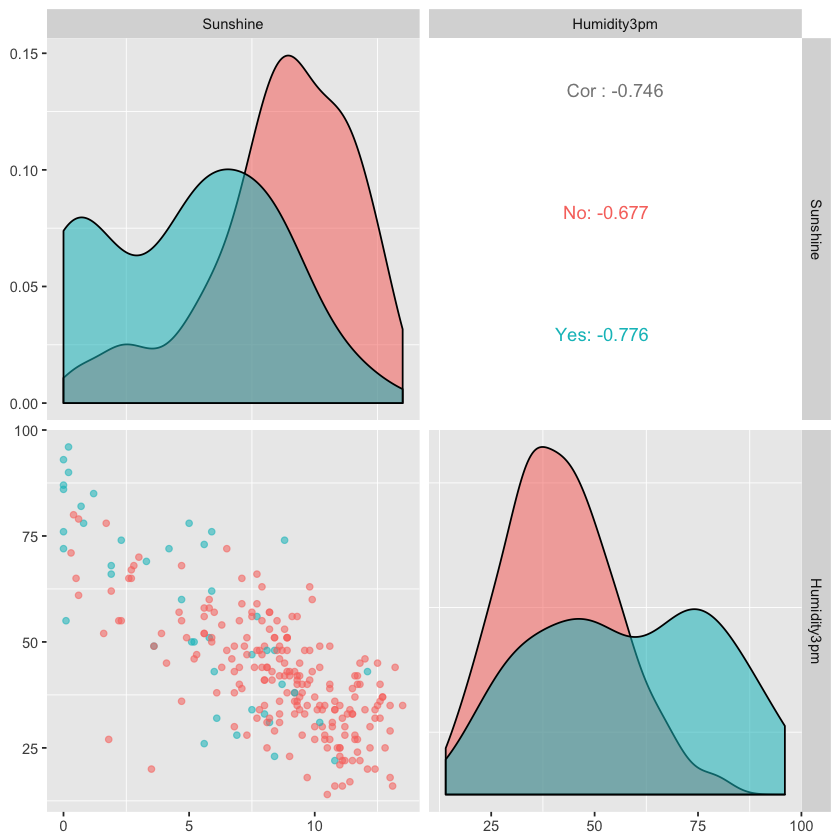

In [18]:
# Use GGally's ggpairs() to do the hard work.

crs$dataset[crs$sample,] %>%
  dplyr::mutate(RainTomorrow=as.factor(RainTomorrow)) %>%
  GGally::ggpairs(columns=c(7,15),
        mapping=ggplot2::aes(colour=RainTomorrow, alpha=0.5),
                diag=list(continuous="density",
                          discrete="bar"),
                upper=list(continuous="cor",
                           combo="box",
                           discrete="ratio"),
                lower=list(continuous="points",
                           combo="denstrip",
                           discrete="facetbar")) +
  ggplot2::theme(panel.grid.major=ggplot2::element_blank())


## Plots with Groups
Change target to Cloud9am  
Then select Boxplot on Sunshine

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


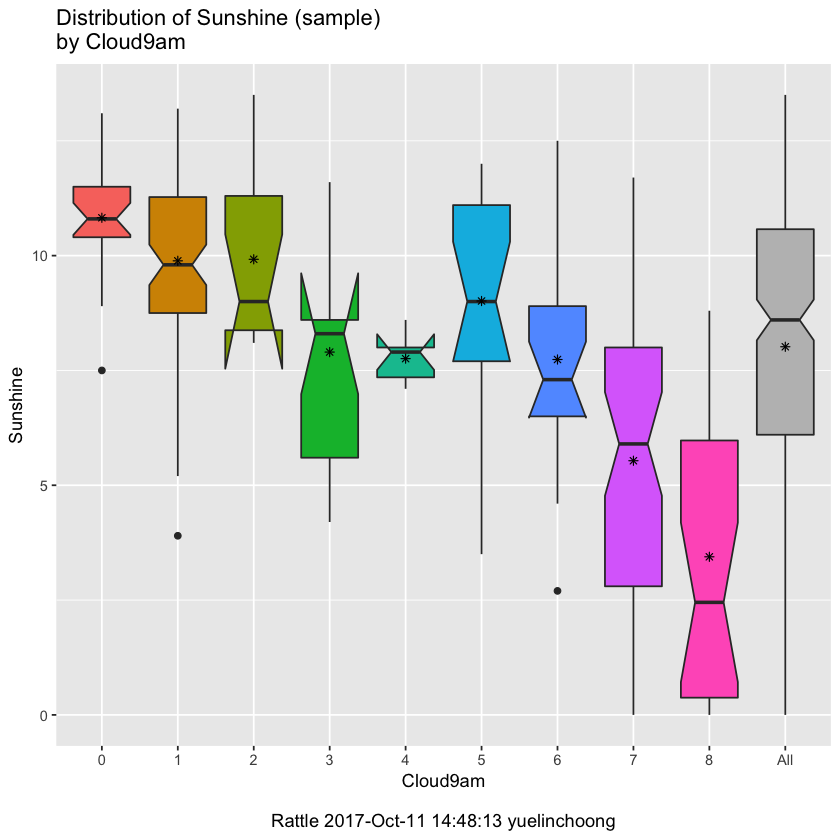

In [19]:
# Use ggplot2 to generate box plot for Sunshine
# Generate a box plot.

p01 <- crs %>%
  with(dataset[sample,]) %>%
  dplyr::mutate(Cloud9am=as.factor(Cloud9am)) %>%
  ggplot2::ggplot(ggplot2::aes(y=Sunshine)) +
  ggplot2::geom_boxplot(ggplot2::aes(x="All"), notch=TRUE, fill="grey") +
  ggplot2::stat_summary(ggplot2::aes(x="All"), fun.y=mean, geom="point", shape=8) +
  ggplot2::geom_boxplot(ggplot2::aes(x=Cloud9am, fill=Cloud9am), notch=TRUE) +
  ggplot2::stat_summary(ggplot2::aes(x=Cloud9am), fun.y=mean, geom="point", shape=8) +
  ggplot2::xlab("Cloud9am\n\nRattle 2017-Oct-11 14:48:13 yuelinchoong") +
  ggplot2::ggtitle("Distribution of Sunshine (sample)\nby Cloud9am") +
  ggplot2::theme(legend.position="none")

# Display the plots.

gridExtra::grid.arrange(p01)

## Correlation plot
Select correlation under Explore tab and execute

In [20]:
# Generate a correlation plot for the variables. 
# The 'corrplot' package provides the 'corrplot' function.
library(corrplot)

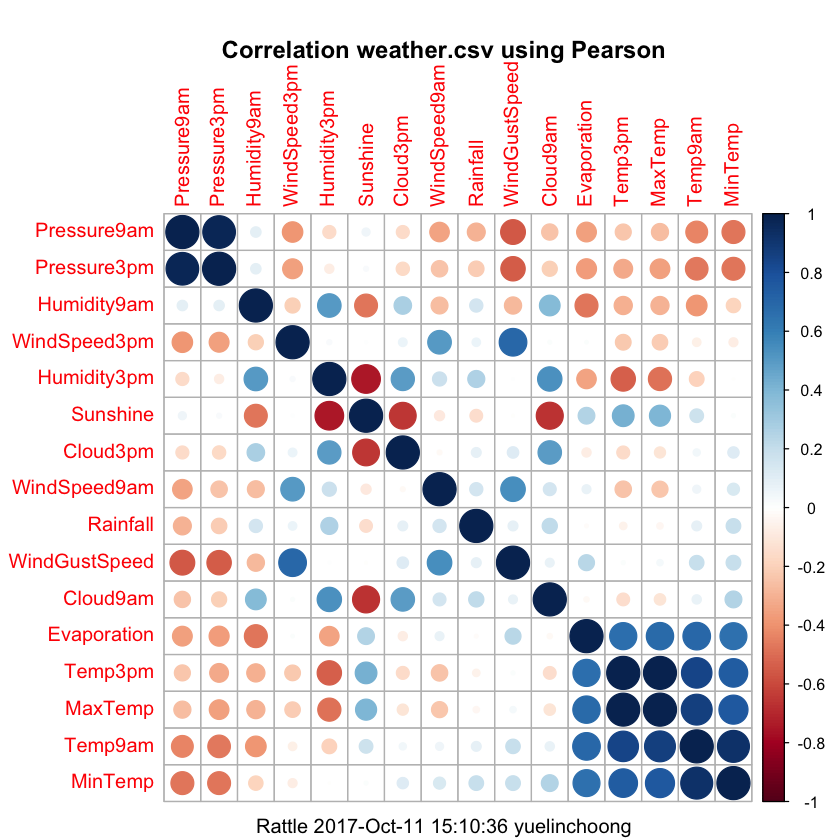

In [21]:
# Correlations work for numeric variables only.
crs$cor <- cor(crs$dataset[crs$sample, crs$numeric], use="pairwise", method="pearson")

# Order the correlations by their strength.
crs$ord <- order(crs$cor[1,])
crs$cor <- crs$cor[crs$ord, crs$ord]

# Display the actual correlations.
#print(crs$cor)

# Graphically display the correlations.
corrplot(crs$cor, mar=c(0,0,1,0))
title(main="Correlation weather.csv using Pearson",
    sub=paste("Rattle", format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))

In [22]:
### Missing Value Correlations

               WindDir9am     Sunshine WindSpeed9am  WindGustDir WindGustSpeed
WindDir9am     1.00000000 -0.027879443   0.49308258 -0.027879443  -0.027879443
Sunshine      -0.02787944  1.000000000  -0.01374687 -0.007874016  -0.007874016
WindSpeed9am   0.49308258 -0.013746868   1.00000000 -0.013746868  -0.013746868
WindGustDir   -0.02787944 -0.007874016  -0.01374687  1.000000000   1.000000000
WindGustSpeed -0.02787944 -0.007874016  -0.01374687  1.000000000   1.000000000

Count of missing values:
   WindDir9am      Sunshine  WindSpeed9am   WindGustDir WindGustSpeed 
           23             2             6             2             2 

Percent missing values:
   WindDir9am      Sunshine  WindSpeed9am   WindGustDir WindGustSpeed 
     8.984375      0.781250      2.343750      0.781250      0.781250 


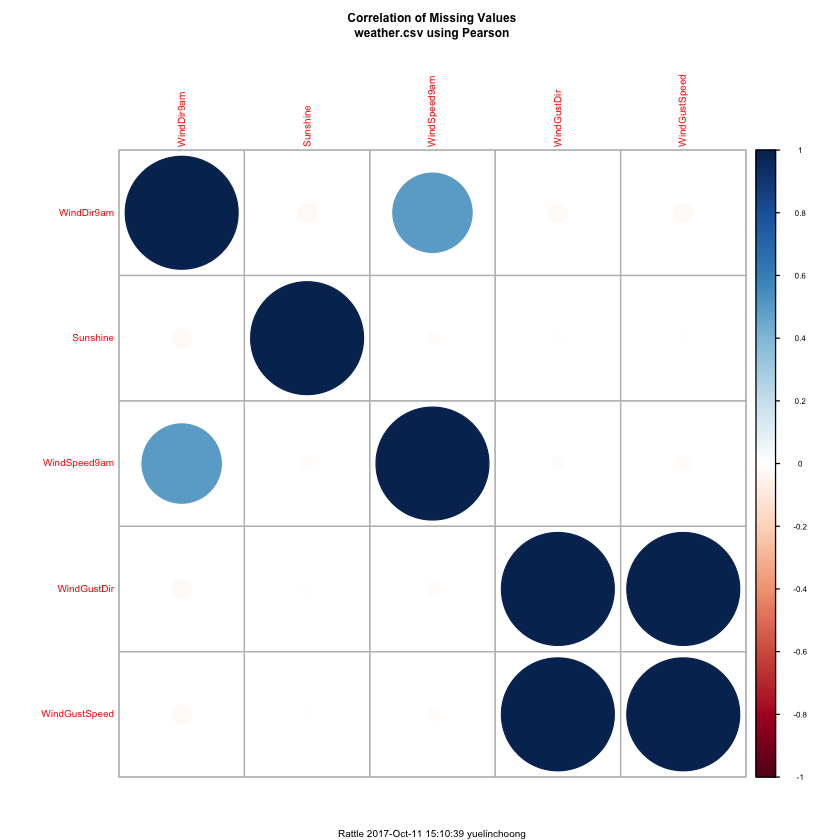

In [23]:
# Correlations work for numeric variables only.
naids <- attr(na.omit(t(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)])), "na.action")
crs$cor <- cor(is.na(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)][naids]), use="pairwise", method="pearson")

# Display the actual correlations.
print(crs$cor)
cat('\nCount of missing values:\n')
print(apply(is.na(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)][naids]),2,sum))
cat('\nPercent missing values:\n')
print(100*apply(is.na(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)][naids]), 2,sum)/nrow(crs$dataset[crs$sample, c(crs$input, crs$risk, crs$target)]))

# Graphically display the correlations.
opar <- par(cex=0.5)
corrplot(crs$cor, mar=c(0,0,1,0))
title(main="Correlation of Missing Values\nweather.csv using Pearson",
    sub=paste("Rattle", format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))
par(opar)

### Hierarchical Variable Correlation 

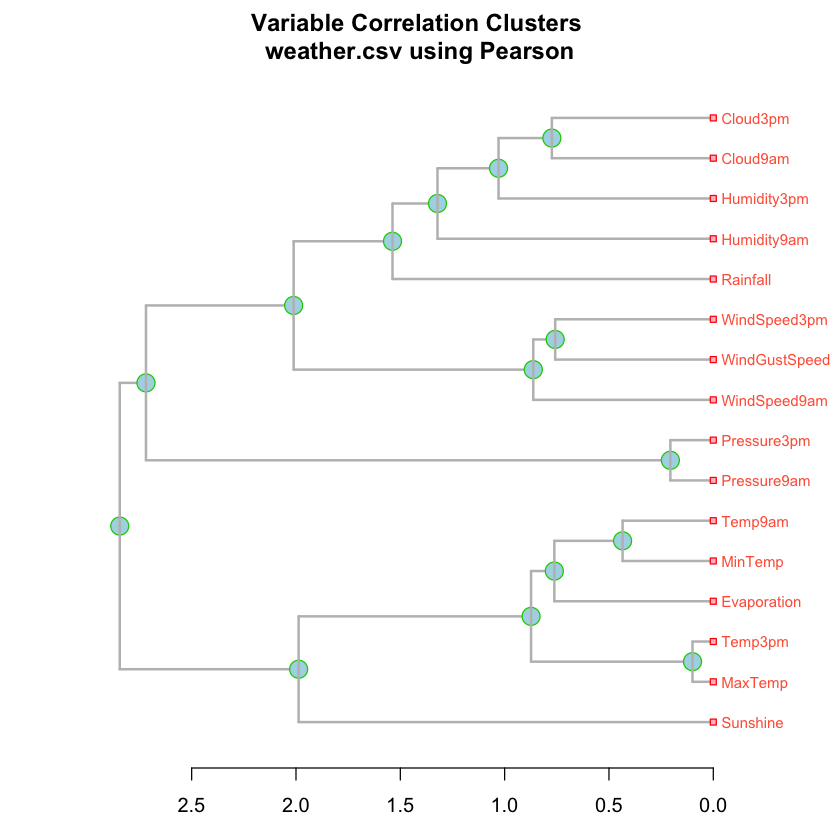

In [24]:
# Generate the correlations (numerics only).
cc <- cor(crs$dataset[crs$sample, crs$numeric], use="pairwise", method="pearson")

# Generate hierarchical cluster of variables.
hc <- hclust(dist(cc), method="average")

# Generate the dendrogram.
dn <- as.dendrogram(hc)

# Now draw the dendrogram.
op <- par(mar = c(3, 4, 3, 4.29))
plot(dn, horiz = TRUE, nodePar = list(col = 3:2, cex = c(2.0, 0.75), pch = 21:22, bg=  c("light blue", "pink"), lab.cex = 0.75, lab.col = "tomato"), edgePar = list(col = "gray", lwd = 2), xlab="Height")
title(main="Variable Correlation Clusters
 weather.csv using Pearson",
    sub=paste("Rattle", format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))
par(op)

# Transform
## Transforming Data
Using Transform will generate new variable. Try with Tem3pm, recenter transform
## Imputation
Impute Zero/Missing of Sunshine for example, using mean.
## Recode
Includes binning. Try bin Tem9am into four equal-size bins. Then explore against evaporation


# Bulding a Model
## Cluster
KMeans - 10 clusters as default.  
The means are followed by a simple measure of the quality of the model: 
The measure used is the sum of the squares of the differences between the observations within each of the ten clusters.  
Enable the Iterate Clusters option and rerun.  
Click on Stats, Data and Discriminant Plot

[1] "22 21 17 21 24 17 39 18 21 46"

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine 
   0.46640911    0.44797905    0.05309762    0.31354615    0.59611563 
WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm 
   0.30438828    0.23805275    0.29894986    0.53038083    0.37125719 
  Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am 
   0.59780986    0.57707363    0.47713415    0.47560976    0.50688462 
      Temp3pm 
   0.47214333

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1,0.7902498,0.5239405,0.187455955,0.4518717,0.2060606,0.3428258,0.28824834,0.2651515,0.6562998,0.6635255,0.4072356,0.3969179,0.9488636,0.8920455,0.7458414,0.5175903
2,0.6386768,0.6863244,0.051679587,0.4159664,0.6363316,0.3924269,0.15098722,0.3283730,0.4728488,0.2590012,0.5133625,0.4542125,0.4702381,0.8690476,0.7211753,0.7035225
3,0.4357881,0.3458237,0.008207934,0.2716263,0.5150327,0.3387668,0.36585366,0.4105392,0.4654283,0.4002869,0.6021909,0.5930954,0.7941176,0.7941176,0.4811014,0.3702659
4,0.6924755,0.6539570,0.080103359,0.4642857,0.6391534,0.3144005,0.23693380,0.2182540,0.5421888,0.3222997,0.5257532,0.4961335,0.8333333,0.2500000,0.7025329,0.6663405
5,0.3342875,0.2074437,0.100775194,0.2530637,0.6777778,0.4984940,0.58333333,0.5434028,0.3874269,0.3958333,0.5252976,0.5500950,0.3020833,0.2916667,0.3421986,0.2467180
6,0.1403233,0.2277580,0.001823985,0.1410035,0.5180828,0.2671864,0.09325681,0.3284314,0.7172343,0.3873745,0.7414466,0.7199598,0.4485294,0.7941176,0.1769712,0.2556406
7,0.6555099,0.7418560,0.027231167,0.4966063,0.8660969,0.3151066,0.20575360,0.2884615,0.3261359,0.1957473,0.5520670,0.5071956,0.1185897,0.2115385,0.7590835,0.7571128
8,0.3407549,0.1548043,0.064599483,0.1070261,0.1547325,0.2817938,0.28048780,0.2835648,0.7621832,0.7140921,0.6241497,0.6087369,0.8888889,0.8750000,0.3035461,0.1716134
9,0.3280625,0.3350280,0.042820229,0.1890756,0.5248677,0.1944923,0.16840883,0.1994048,0.6900585,0.4076655,0.7060253,0.6897300,0.7261905,0.3154762,0.3442756,0.3762231
10,0.2824427,0.3705709,0.009942703,0.2250639,0.7371981,0.1909377,0.12301166,0.2192029,0.5301297,0.2735949,0.7226043,0.7070482,0.1059783,0.2010870,0.3628122,0.4111823


[1]  9.086169  7.946959  4.814220  7.160406  9.800832  4.040037 11.025934
 [8]  7.216990  5.372418  9.132442

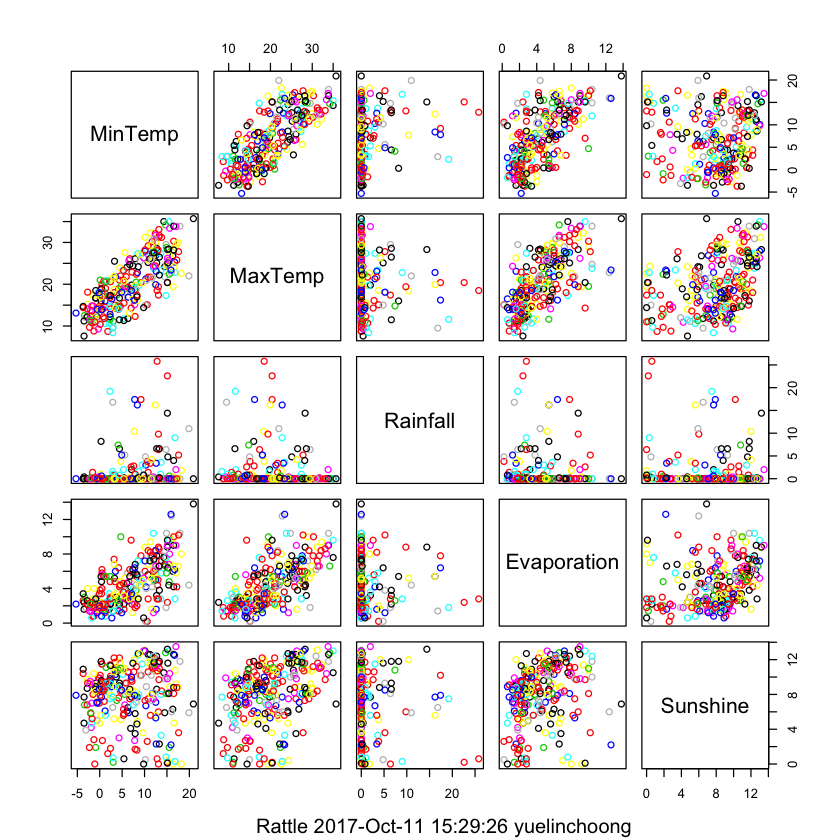

In [34]:
# KMeans 
# The 'reshape' package provides the 'rescaler' function.
library(reshape)

# Generate a kmeans cluster of size 10.
crs$kmeans <- kmeans(sapply(na.omit(crs$dataset[crs$sample, crs$numeric]), rescaler, "range"), 10)

# Report on the cluster characteristics. 
# Cluster sizes:
paste(crs$kmeans$size, collapse=' ')

# Data means:
colMeans(sapply(na.omit(crs$dataset[crs$sample, crs$numeric]), rescaler, "range"))

# Cluster centers:
crs$kmeans$centers

# Within cluster sum of squares:
crs$kmeans$withinss
# Time taken: 0.00 secs

# Display a scatterplot matrix for the KMeans clustering. 
# Keep just the first 5 variables for the plot.
vars <- 1:5

# Generate a data plot.
plot(na.omit(crs$dataset[crs$sample, intersect(crs$input, crs$numeric)][vars]), col=crs$kmeans$cluster)
title(main="",
    sub=paste("Rattle", format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))

# Model
## Decision Tree 

### The 'rpart' package provides the 'rpart' function.
Recursive partitioning for classification,
regression and survival trees.

In [25]:
library(rpart)

### Build the Decision Tree model.

In [26]:
crs$rpart <- rpart(RainTomorrow ~ .,
    data=crs$dataset[crs$train, c(crs$input, crs$target)],
    method="class",
    parms=list(split="information"),
    control=rpart.control(usesurrogate=0, 
        maxsurrogate=0))

### Generate a textual view of the Decision Tree model.

In [27]:
print(crs$rpart)
printcp(crs$rpart)
cat("\n")

n= 256 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 256 43 No (0.8320312 0.1679688)  
   2) Humidity3pm< 71.5 236 27 No (0.8855932 0.1144068)  
     4) Pressure3pm>=1012.85 186  9 No (0.9516129 0.0483871)  
       8) Sunshine>=8.75 95  0 No (1.0000000 0.0000000) *
       9) Sunshine< 8.75 89  9 No (0.8988764 0.1011236)  
        18) MaxTemp< 17.45 48  0 No (1.0000000 0.0000000) *
        19) MaxTemp>=17.45 41  9 No (0.7804878 0.2195122)  
          38) WindGustDir=ENE,NE,NNE,NNW,SE,SW 17  0 No (1.0000000 0.0000000) *
          39) WindGustDir=E,ESE,NW,SSW,W,WNW 23  9 No (0.6086957 0.3913043)  
            78) WindSpeed9am>=6.5 12  2 No (0.8333333 0.1666667) *
            79) WindSpeed9am< 6.5 10  4 Yes (0.4000000 0.6000000) *
     5) Pressure3pm< 1012.85 50 18 No (0.6400000 0.3600000)  
      10) WindGustDir=ENE,NE,NNE,W,WNW,WSW 15  0 No (1.0000000 0.0000000) *
      11) WindGustDir=E,ESE,N,NNW,NW,SSE,SW 35 17 Yes (0.4857143 0.5142857)  
        22) Wi

### Plot the resulting Decision Tree.
We use the rpart.plot package.

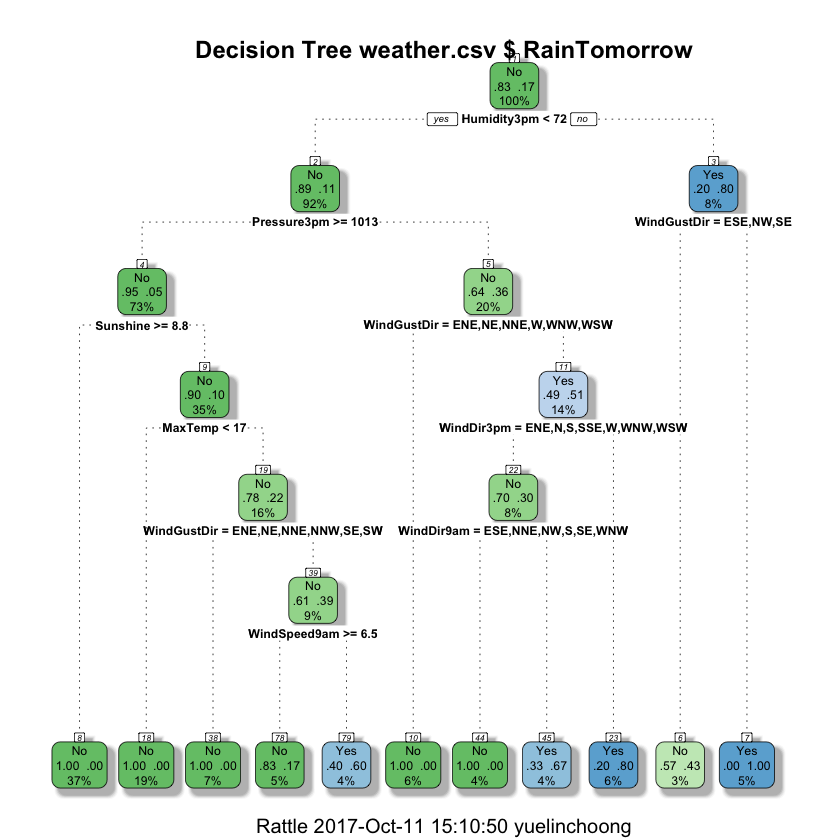

In [28]:
fancyRpartPlot(crs$rpart, main="Decision Tree weather.csv $ RainTomorrow")

### List the rules from the tree using a Rattle support function.

In [29]:
asRules(crs$rpart)


 Rule number: 7 [RainTomorrow=Yes cover=13 (5%) prob=1.00]
   Humidity3pm>=71.5
   WindGustDir=E,ENE,NNW,S,SSE,SSW,SW,W,WNW

 Rule number: 23 [RainTomorrow=Yes cover=15 (6%) prob=0.80]
   Humidity3pm< 71.5
   Pressure3pm< 1013
   WindGustDir=E,ESE,N,NNW,NW,SSE,SW
   WindDir3pm=ESE,NNE,NNW,NW

 Rule number: 45 [RainTomorrow=Yes cover=9 (4%) prob=0.67]
   Humidity3pm< 71.5
   Pressure3pm< 1013
   WindGustDir=E,ESE,N,NNW,NW,SSE,SW
   WindDir3pm=ENE,N,S,SSE,W,WNW,WSW
   WindDir9am=E,N,NNW,SSE,WSW

 Rule number: 79 [RainTomorrow=Yes cover=10 (4%) prob=0.60]
   Humidity3pm< 71.5
   Pressure3pm>=1013
   Sunshine< 8.75
   MaxTemp>=17.45
   WindGustDir=E,ESE,NW,SSW,W,WNW
   WindSpeed9am< 6.5

 Rule number: 6 [RainTomorrow=No cover=7 (3%) prob=0.43]
   Humidity3pm>=71.5
   WindGustDir=ESE,NW,SE

 Rule number: 78 [RainTomorrow=No cover=12 (5%) prob=0.17]
   Humidity3pm< 71.5
   Pressure3pm>=1013
   Sunshine< 8.75
   MaxTemp>=17.45
   WindGustDir=E,ESE,NW,SSW,W,WNW
   WindSpeed9am>=6.5

 Rule num

### Bar Plot, Dot Plot & Mosaic Plot 

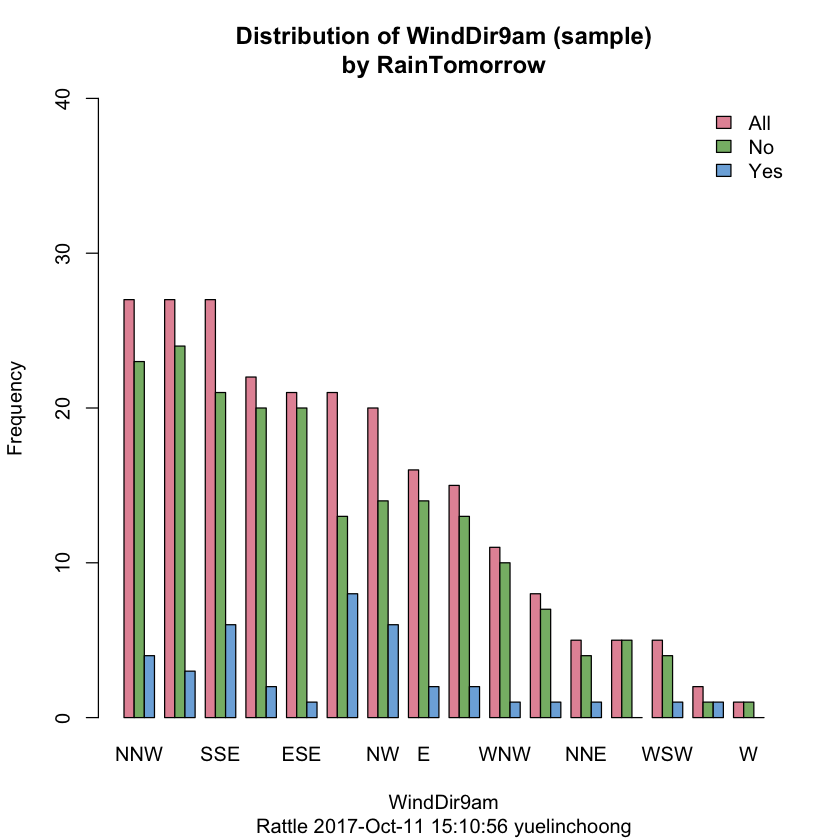

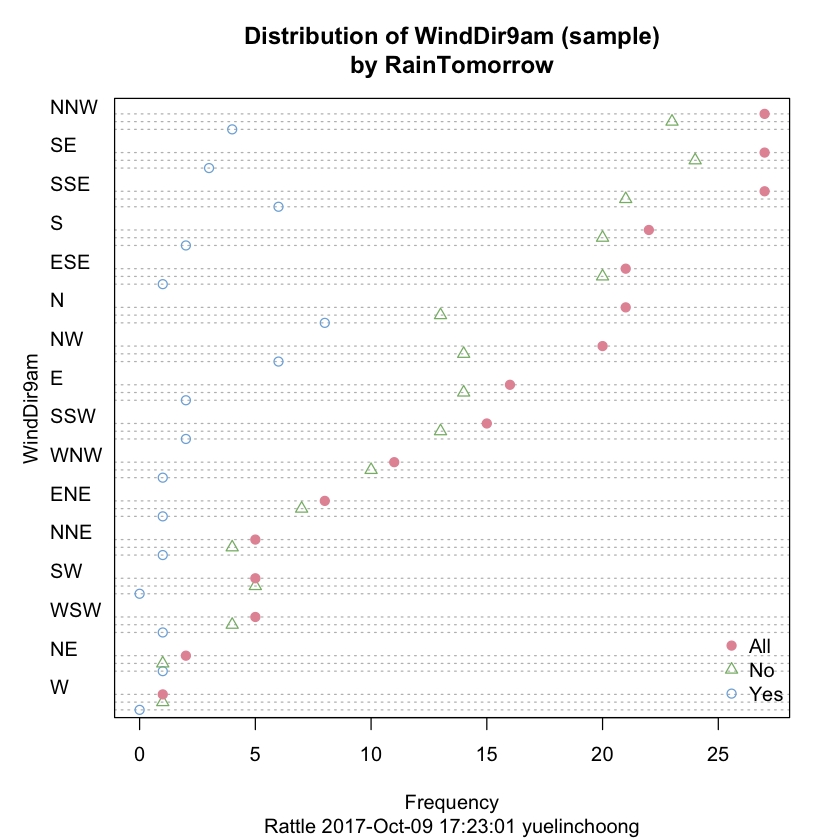

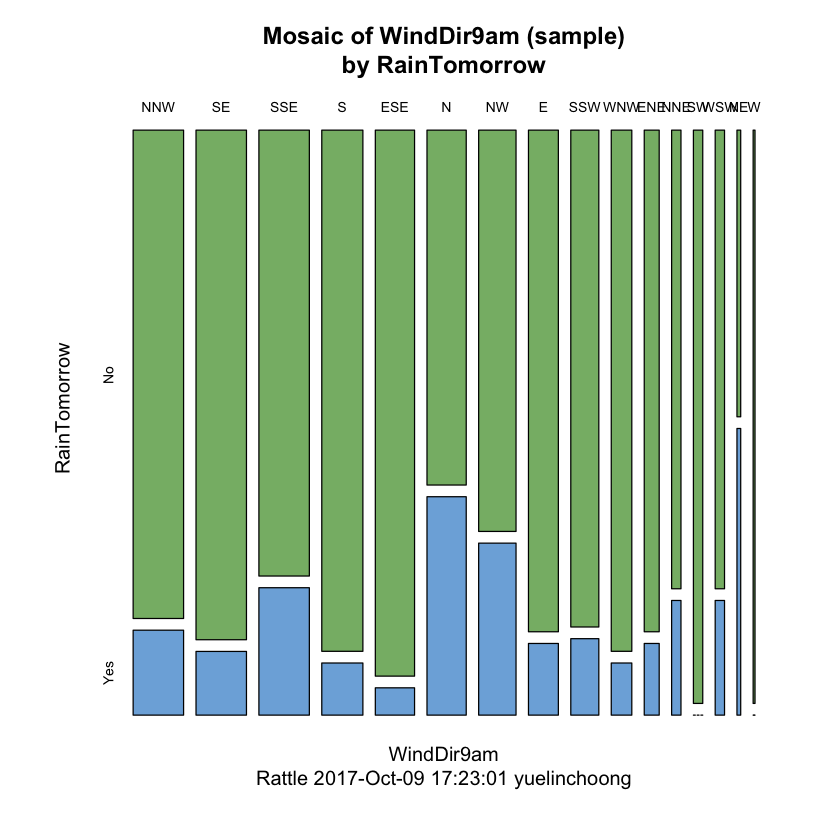

In [30]:
# Bar Plot 
# Generate the summary data for plotting.
ds <- rbind(summary(na.omit(crs$dataset[crs$sample,]$WindDir9am)),
    summary(na.omit(crs$dataset[crs$sample,][crs$dataset[crs$sample,]$RainTomorrow=="No",]$WindDir9am)),
    summary(na.omit(crs$dataset[crs$sample,][crs$dataset[crs$sample,]$RainTomorrow=="Yes",]$WindDir9am)))

# Sort the entries.
ord <- order(ds[1,], decreasing=TRUE)

# Plot the data.
bp <-  barplot2(ds[,ord], beside=TRUE, ylab="Frequency", xlab="WindDir9am", ylim=c(0, 40), col=colorspace::rainbow_hcl(3))

# Add a legend to the plot.
legend("topright", bty="n", c("All","No","Yes"),  fill=colorspace::rainbow_hcl(3))

# Add a title to the plot.
title(main="Distribution of WindDir9am (sample)\nby RainTomorrow",
    sub=paste("Rattle", format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))

# Dot Plot 
# Generate the summary data for the plot.
ds <- rbind(summary(na.omit(crs$dataset[crs$sample,]$WindDir9am)),
    summary(na.omit(crs$dataset[crs$sample,][crs$dataset[crs$sample,]$RainTomorrow=="No",]$WindDir9am)),
    summary(na.omit(crs$dataset[crs$sample,][crs$dataset[crs$sample,]$RainTomorrow=="Yes",]$WindDir9am)))

# Sort the entries.
ord <- order(ds[1,], decreasing=TRUE)

# Plot the data.
dotchart(ds[nrow(ds):1,ord], main="Distribution of WindDir9am (sample)\nby RainTomorrow", sub="Rattle 2017-Oct-09 17:23:01 yuelinchoong", col=rev(colorspace::rainbow_hcl(3)), labels="", xlab="Frequency", ylab="WindDir9am", pch=c(1:2, 19))

# Add a legend.
legend("bottomright", bty="n", c("All","No","Yes"), col=colorspace::rainbow_hcl(3), pch=c(19, 2:1))

# Mosaic Plot 
# Generate the table data for plotting.
ds <- table(crs$dataset[crs$sample,]$WindDir9am, crs$dataset[crs$sample,]$RainTomorrow)

# Sort the entries.
ord <- order(apply(ds, 1, sum), decreasing=TRUE)

# Plot the data.
mosaicplot(ds[ord,], main="Mosaic of WindDir9am (sample)
by RainTomorrow", sub="Rattle 2017-Oct-09 17:23:01 yuelinchoong", color=colorspace::rainbow_hcl(3)[-1], cex=0.7, xlab="WindDir9am", ylab="RainTomorrow")

## Evaluating the Model: Confusion Matrix

In [31]:
# Evaluate model performance on the testing dataset. 
# Generate an Error Matrix for the Decision Tree model.
# Obtain the response from the Decision Tree model.
crs$pr <- predict(crs$rpart, newdata=crs$dataset[crs$test, c(crs$input, crs$target)],
    type="class")

# Generate the confusion matrix showing counts.
rattle::errorMatrix(crs$dataset[crs$test, c(crs$input, crs$target)]$RainTomorrow, crs$pr, count=TRUE)

# Generate the confusion matrix showing proportions.
(per <- rattle::errorMatrix(crs$dataset[crs$test, c(crs$input, crs$target)]$RainTomorrow, crs$pr))

# Calculate the overall error percentage.
cat(100-sum(diag(per), na.rm=TRUE))

# Calculate the averaged class error percentage.
cat(mean(per[,"Error"], na.rm=TRUE))

,No,Yes,Error
No,39,6,13.3
Yes,8,3,72.7


,No,Yes,Error
No,69.6,10.7,13.3
Yes,14.3,5.4,72.7


2543